## A few nice plots of the catalogue from Gannon et al. (2024) as it gets updated
#### Jonah  Gannon November 2024 (Swinburne Post-doc)

In [12]:
# Import libraries and the data:
import numpy as np
from matplotlib import gridspec
from Plotting.plotting_pretties import *
import seaborn as sns
from astropy.table import Table
######################################### user inputs ##################################################################

udg_data_table = Table.read('./udg_data.csv').to_pandas()

########################################################################################################################

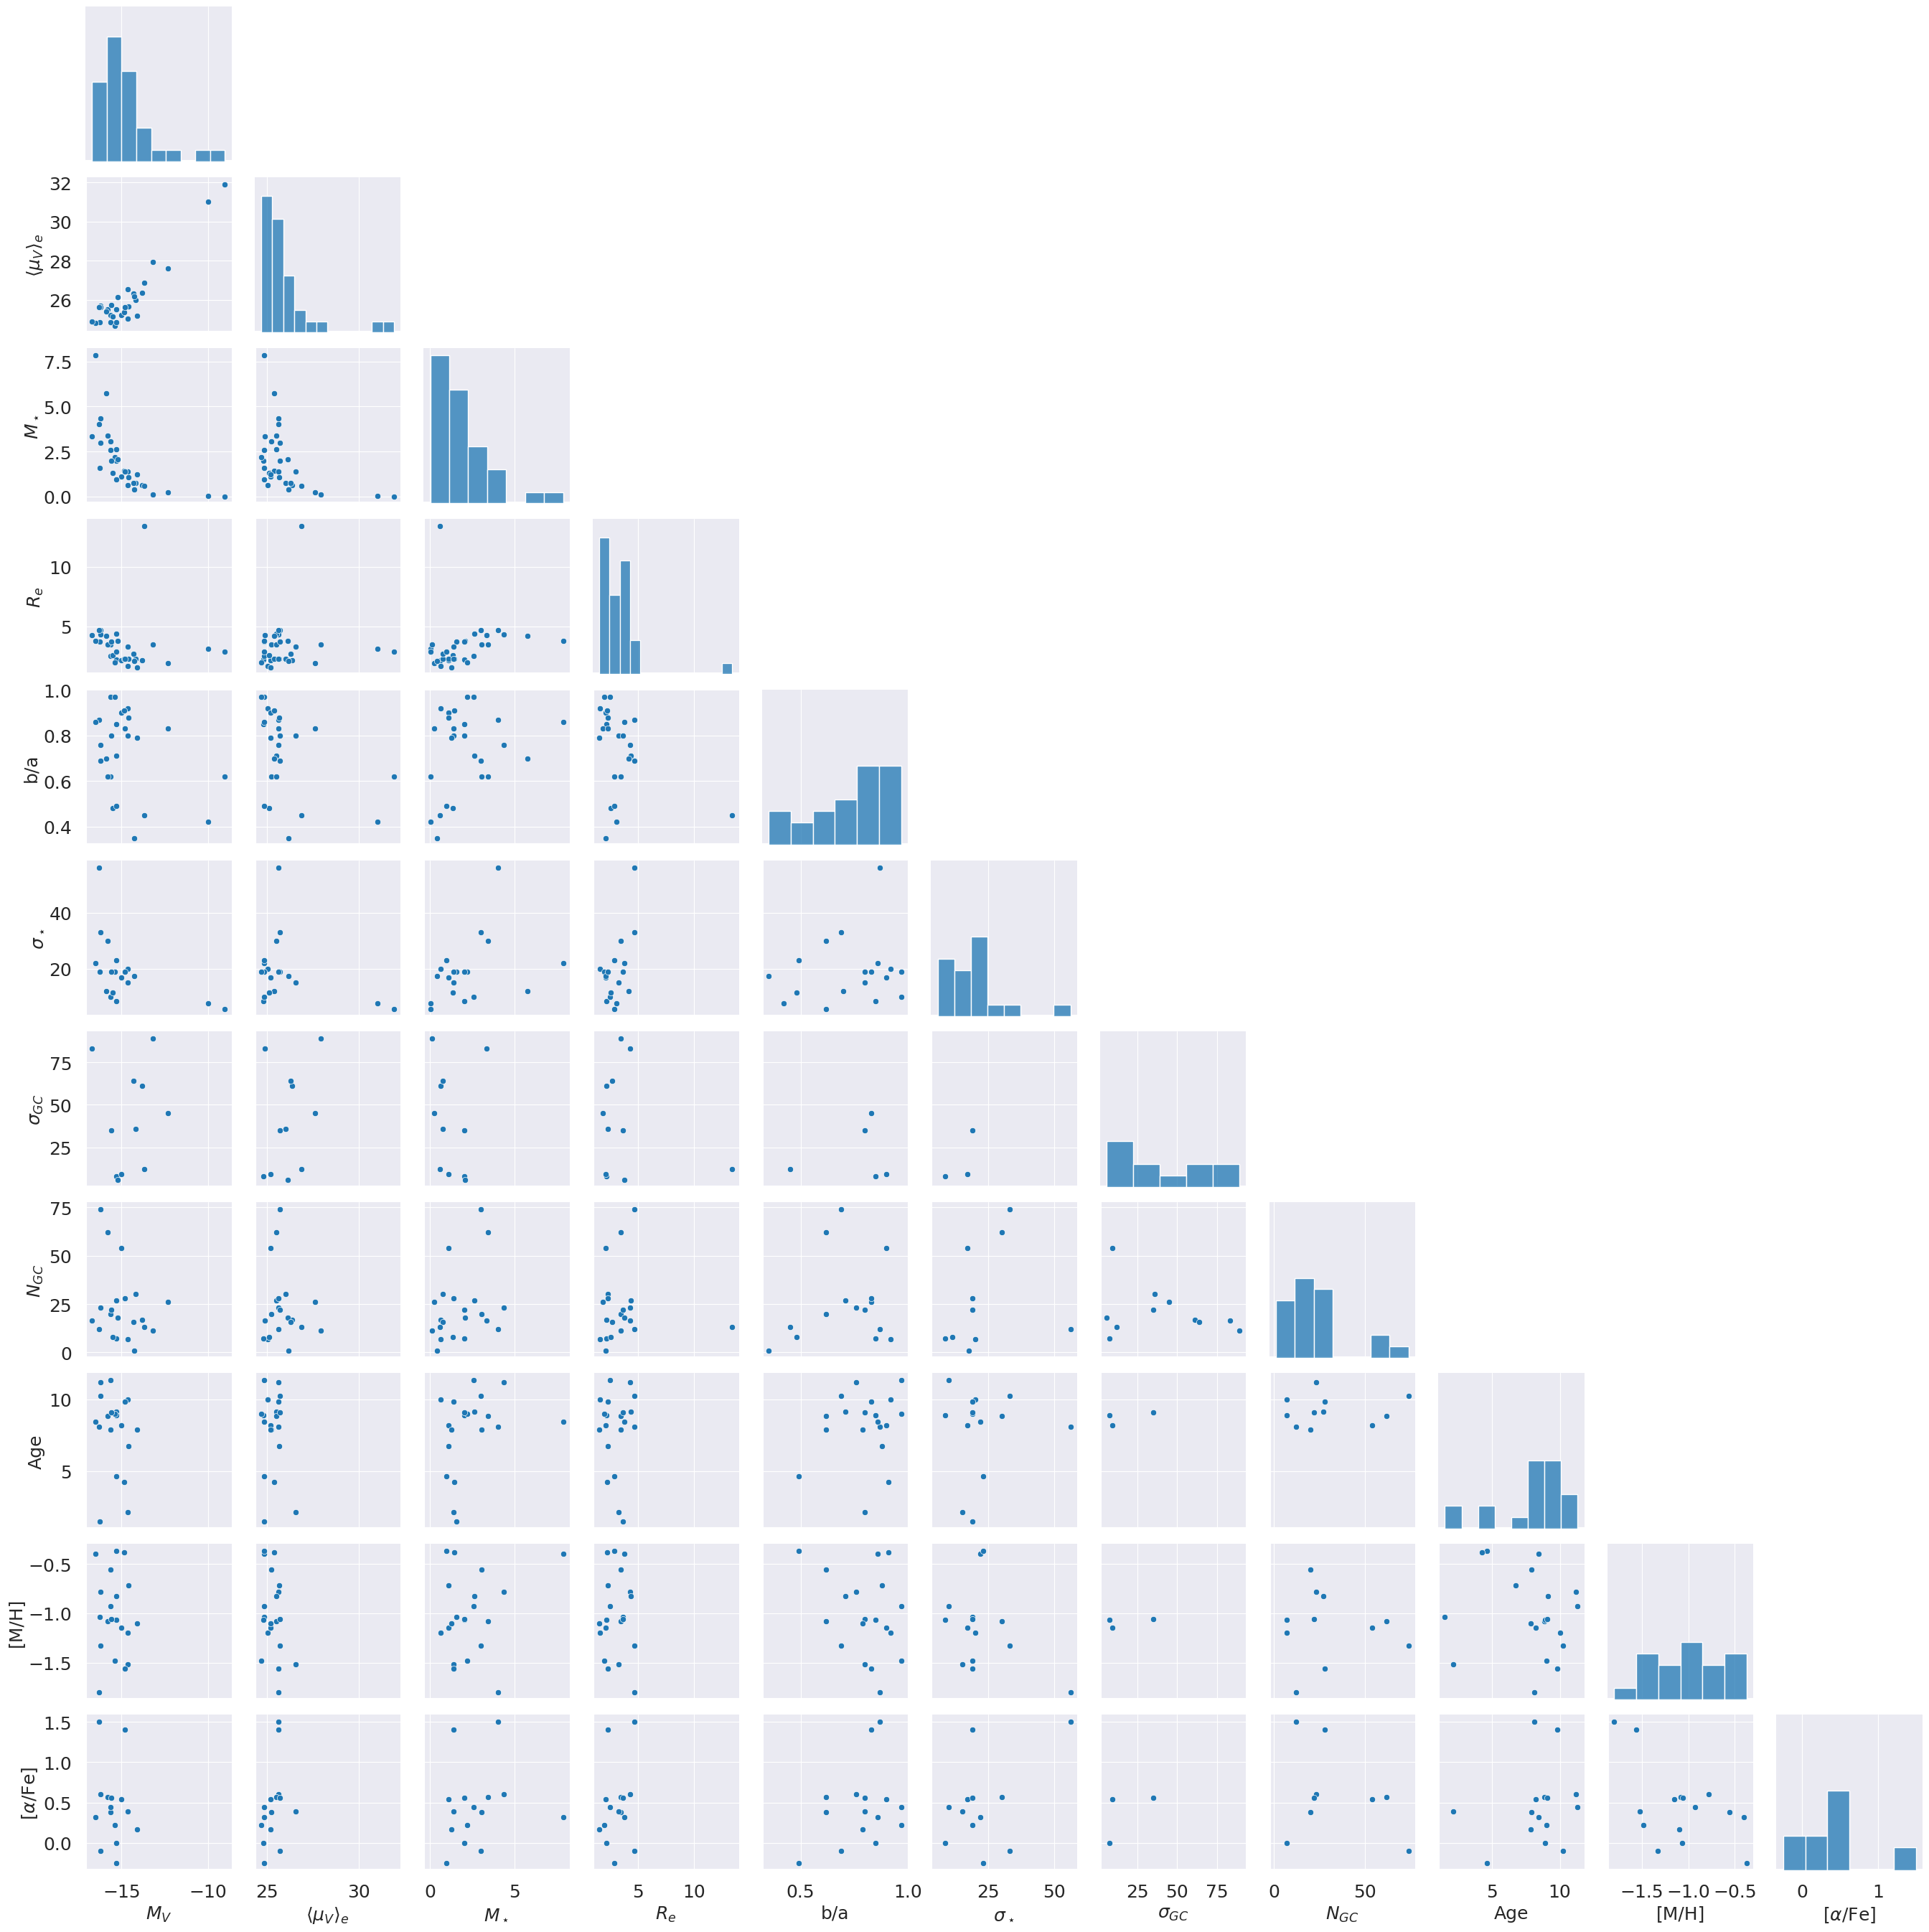

In [13]:
# Plot of the properties in a pairplot
udg_data_table[udg_data_table==-999] = np.nan

labels = ["$M_V$", "$\langle \mu_{V}\\rangle _{e}$","$M_\star$","$R_e$","b/a","$\sigma_\star$","$\sigma_{GC}$","$N_{GC}$","Age","[M/H]","[$\\alpha$/Fe]"]

pairplot = sns.pairplot(udg_data_table,
             vars = ["M_V","<mu_V>_e","Stellar mass","R_e","b/a","stellar_sigma","GC_sigma","N_gc","Mass_weighted_age","Mass_weighted_metallicity [Z/H]","[Alpha/Fe]"],
             corner = True, height = 2.5)
             # height = 2, layout_pad = 0.1, corner = "True", dropna = True)

pairplot.x_vars = labels
pairplot.y_vars = labels
pairplot._add_axis_labels()
plt.show()

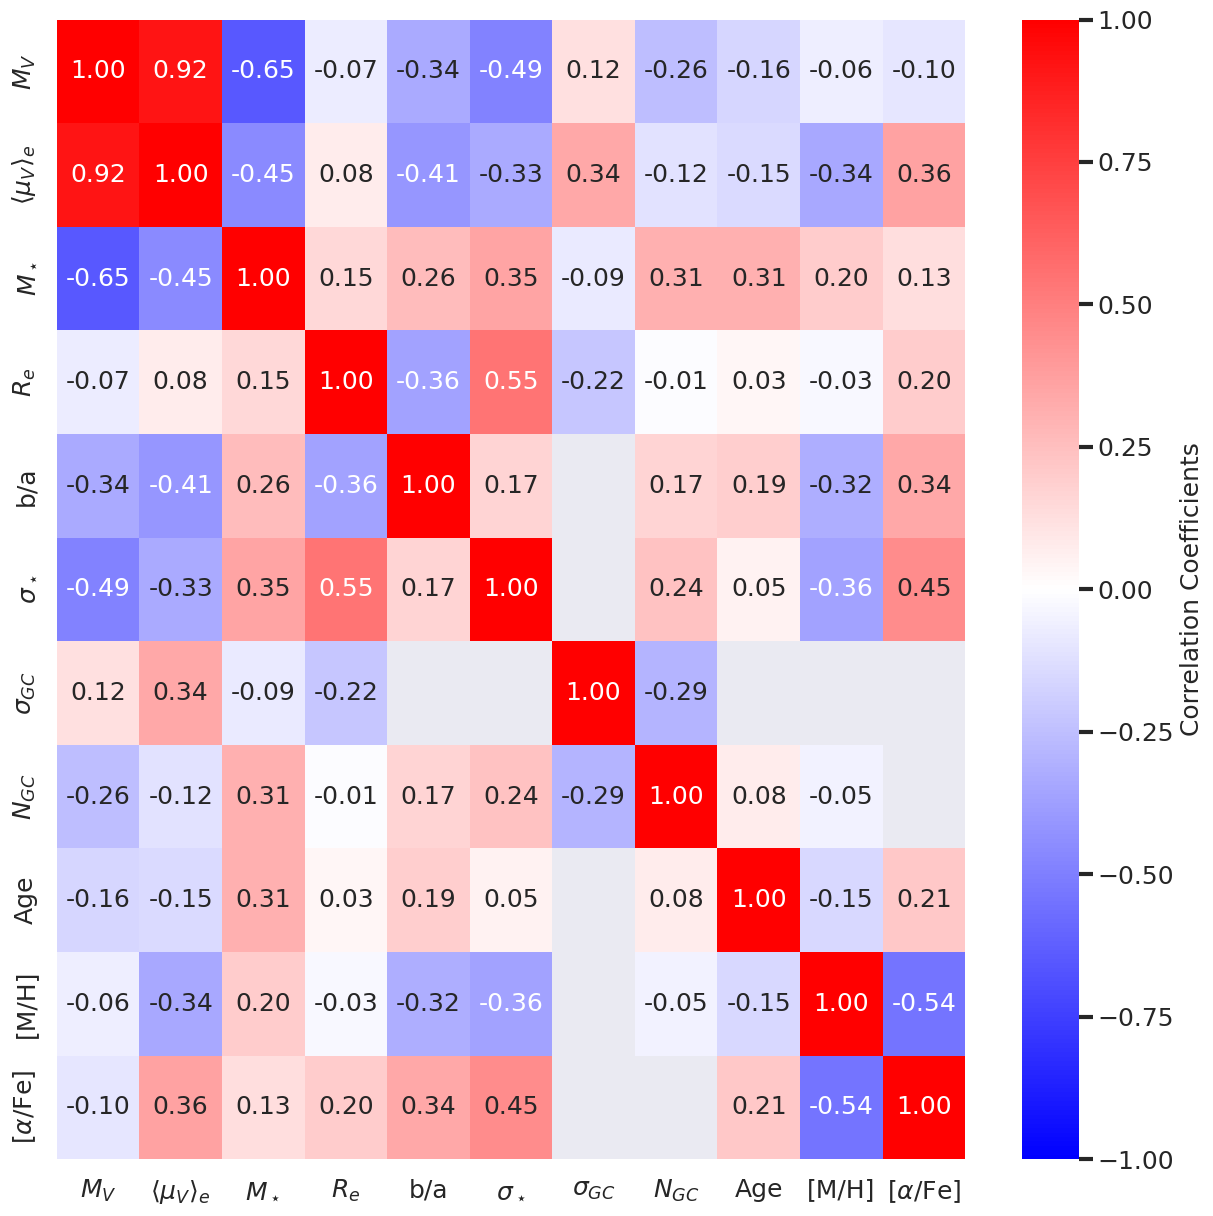

In [14]:
# look to see if there are any correlations

plt.figure(figsize = (12.5,12.5))
heatmap = sns.heatmap(udg_data_table[["M_V","<mu_V>_e","Stellar mass","R_e","b/a","stellar_sigma","GC_sigma","N_gc","Mass_weighted_age","Mass_weighted_metallicity [Z/H]","[Alpha/Fe]"]].corr(min_periods=10),
                      xticklabels = labels,
                      yticklabels = labels,
                      annot=True, fmt=".2f",
                      vmin = -1, vmax = 1,  cmap = "bwr",
                      cbar_kws={'label': 'Correlation Coefficients'})
             # height = 2, layout_pad = 0.1, corner = "True", dropna = True)

plt.show()

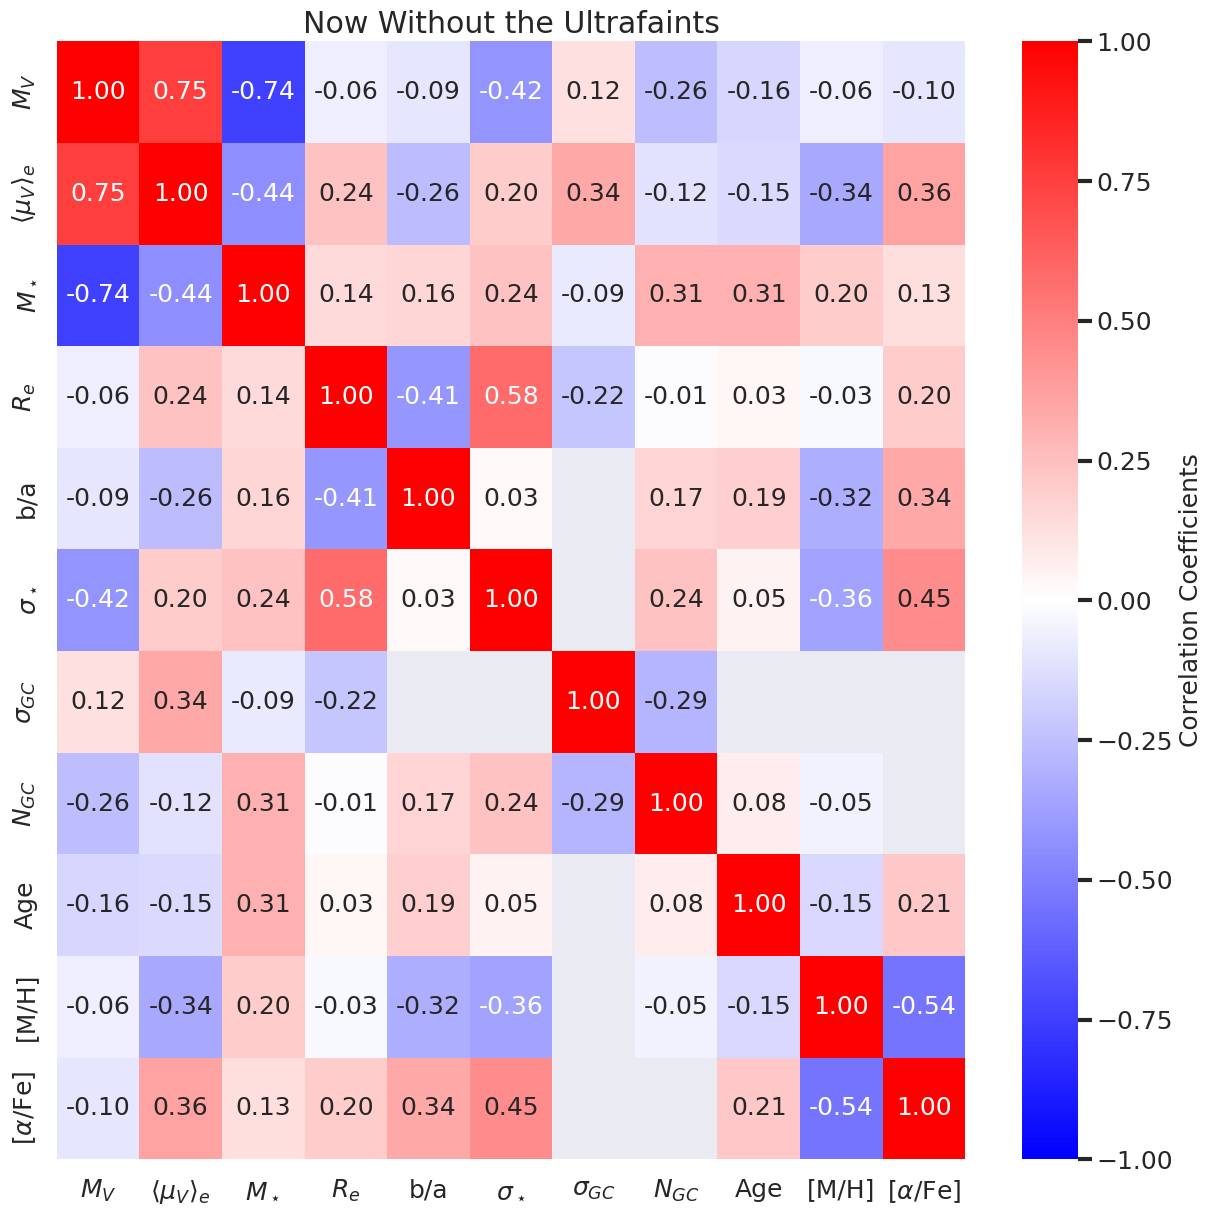

In [15]:
# Remove the Milky-Way Ultra-faints and check again

udg_data_table_reduced = udg_data_table[udg_data_table["<mu_V>_e"]<28]

plt.figure(figsize = (12.5,12.5))
heatmap = sns.heatmap(udg_data_table_reduced[["M_V","<mu_V>_e","Stellar mass","R_e","b/a","stellar_sigma","GC_sigma","N_gc","Mass_weighted_age","Mass_weighted_metallicity [Z/H]","[Alpha/Fe]"]].corr(min_periods=10),
                      xticklabels = labels,
                      yticklabels = labels,
                      annot=True, fmt=".2f",
                      vmin = -1, vmax = 1,  cmap = "bwr",
                      cbar_kws={'label': 'Correlation Coefficients'})
             # height = 2, layout_pad = 0.1, corner = "True", dropna = True)
plt.title("Now Without the Ultrafaints")
plt.show()